In [1]:
import xarray as xr
import pandas as pd
import os
import numpy as np

# Re-organize InSAR ice velocity data

This is an example of cleaning data accessed in netcdf format and preparing it for analysis. 

The dataset we will use contains InSAR-derived ice velocity for 10 years over the Amundsen Sea Embayment in Antarctica. The data is downloaded from: https://nsidc.org/data/NSIDC-0545/versions/1 but this example uses only a subset of the full dataset.

Downloaded data is `.hdr` and `.dat` files for each year, and a `.nc` for all of the years together. 

The `.nc` object is a dataset with dimensions x,y and data vars for each year. So for each year there are `vx`,`vy`,`err` vars. We'd like to re-organize this so that there are 3 variables (`vx`, `vy` and `err`) that exist along a time dimension.

In [3]:
#ds = xr.tutorial.open_dataset('ASE_ice_velocity.nc')
ds = xr.open_dataset('/Users/emarshall/Desktop/siparcs/xarray-data/ASE_ice_velocity.nc')

Take a look at the dataset:

In [4]:
ds

<xarray.Dataset>
Dimensions:  (ny: 800, nx: 500)
Dimensions without coordinates: ny, nx
Data variables: (12/32)
    vx1996   (ny, nx) float32 ...
    vy1996   (ny, nx) float32 ...
    err1996  (ny, nx) float32 ...
    vx2000   (ny, nx) float32 ...
    vy2000   (ny, nx) float32 ...
    err2000  (ny, nx) float32 ...
    ...       ...
    err2011  (ny, nx) float32 ...
    vx2012   (ny, nx) float32 ...
    vy2012   (ny, nx) float32 ...
    err2012  (ny, nx) float32 ...
    xaxis    (nx) float32 ...
    yaxis    (ny) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Check the projection:

In [5]:
ds.attrs['Projection']

'         Polar Stereographic South'

Currently the dimensions on the object are `ny` and `nx` but the object has no coordinates. If we look in the `data_vars` we can see there are two variables named `xaxis` and `yaxis`. It seems like these are the coordinate values that should exist along the `nx` and `ny` dimensions, respectively. Let's confirm that they match the dimensions `nx` and `ny` in length and then assign them as coordinates:

In [6]:
print(ds.dims['ny'])
print(ds.dims['nx'])

800
500


In [7]:
print(len(ds.yaxis.data))
print(len(ds.xaxis.data))

800
500


We'll assign the `xaxis` and `yaxis` vars to be coordinates, and drop them from the `data_vars`. We'll first use `swap_dims()` to swap `ny` for `yaxis` and `nx` for `xaxis`. 

In [8]:
ds = (
    ds.swap_dims({'ny':'yaxis', 'nx':'xaxis'})
)

In [9]:
ds

<xarray.Dataset>
Dimensions:  (yaxis: 800, xaxis: 500)
Coordinates:
  * xaxis    (xaxis) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * yaxis    (yaxis) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Data variables: (12/30)
    vx1996   (yaxis, xaxis) float32 ...
    vy1996   (yaxis, xaxis) float32 ...
    err1996  (yaxis, xaxis) float32 ...
    vx2000   (yaxis, xaxis) float32 ...
    vy2000   (yaxis, xaxis) float32 ...
    err2000  (yaxis, xaxis) float32 ...
    ...       ...
    vx2011   (yaxis, xaxis) float32 ...
    vy2011   (yaxis, xaxis) float32 ...
    err2011  (yaxis, xaxis) float32 ...
    vx2012   (yaxis, xaxis) float32 ...
    vy2012   (yaxis, xaxis) float32 ...
    err2012  (yaxis, xaxis) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Rename `yaxis` and `xaxis`: 

In [10]:
ds = (
    ds.rename({'xaxis':'x','yaxis':'y'})
)

In [11]:
ds

<xarray.Dataset>
Dimensions:  (y: 800, x: 500)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Data variables: (12/30)
    vx1996   (y, x) float32 ...
    vy1996   (y, x) float32 ...
    err1996  (y, x) float32 ...
    vx2000   (y, x) float32 ...
    vy2000   (y, x) float32 ...
    err2000  (y, x) float32 ...
    ...       ...
    vx2011   (y, x) float32 ...
    vy2011   (y, x) float32 ...
    err2011  (y, x) float32 ...
    vx2012   (y, x) float32 ...
    vy2012   (y, x) float32 ...
    err2012  (y, x) float32 ...
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Now we have x and y coordinates and 30 data variables. However, the `data_vars` are really only 3 unique variables that exist along a time dimension (with a length of 10). 
We want to add a time dimension to the dataset and concatenate the data variables in each of the three groups together.

Start by making a few objects that we'll use while we're re-organizing. These are: a list of all the variables in the dataset (`var_ls`), a list of the years covered by the dataset that are currently stored in variable names (`yr_ls`) and then finally lists for each variable (`vx_ls`,`vy_ls` and `err_ls`). These are all of the variables in the original dataset that correspond with that main variable group (`vx`, `vy` or `err`).

In [12]:
var_ls = list(ds)

vx_ls = [var for var in var_ls if 'vx' in var]
vy_ls = [var for var in var_ls if 'vy' in var]
err_ls = [var for var in var_ls if 'err' in var]

yr_ls = [int(var[-4:]) for var in vx_ls]

Now we are going to group the `dataset.data_vars` into `vx`,`vy`, and `err` and prepare to concatenate them along the time dimension. We will perform the same operations for all three variables but we will demonstrate the process for the first variable in several steps, before showing the operation wrapped into one command for the other two variables. There is a great explanation of this kind of step [here](https://towardsdatascience.com/pythonic-way-to-perform-statistics-across-multiple-variables-with-xarray-d0221c78e34a). At the end of this step, for `vx`, `vy` and `err` we will have a list of `xr.DataArrays` that all have a time dimension on the 0-axis. 

In the cell below, we make a list of the `xr.DataArrays` in the original `xr.Dataset` that correspond to that variable. 

In [14]:
da_vx_ls = [ds[var] for var in vx_ls]

You can see that `da_vx_ls` is a `list` object with a length of 10, and each element of the list is a `xr.DataArray` corresponding to `vx` vars in the original `xr.Dataset`

In [15]:
print('Object type: ', type(da_vx_ls))
print('Ojbect length: ', len(da_vx_ls))
da_vx_ls[0]

Object type:  <class 'list'>
Ojbect length:  10


<xarray.DataArray 'vx1996' (y: 800, x: 500)>
[400000 values with dtype=float32]
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

next, we will add a time dimension to every element of `da_vx_ls`:

In [16]:
da_vx_ls = [da_vx_ls[var].expand_dims('time') for var in range(len(da_vx_ls))]

Now you can see that each list element is an `xr.DataArray` as before, but that there is now a time dimension.

In [17]:
da_vx_ls[0]

<xarray.DataArray 'vx1996' (time: 1, y: 800, x: 500)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  9.245862  ,  18.962032  ,  10.641378  , ..., -55.529568  ,
         -55.257446  , -55.041527  ],
        [  8.298822  ,  15.363108  ,   0.68973774, ..., -55.069824  ,
         -54.748978  , -54.98798   ],
        [  9.707195  ,  10.79028   ,  -6.217383  , ..., -54.61062   ,
         -55.119358  , -54.695946  ]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
Dimensions without coordinates: time
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

Assign time as a coordinate to each `xr.DataArray` in the list: 

In [18]:
da_vx_ls = [da_vx_ls[var].assign_coords(time=[yr_ls[var]]) for var in range(len(da_vx_ls))]
da_vx_ls[0]

<xarray.DataArray 'vx1996' (time: 1, y: 800, x: 500)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [  9.245862  ,  18.962032  ,  10.641378  , ..., -55.529568  ,
         -55.257446  , -55.041527  ],
        [  8.298822  ,  15.363108  ,   0.68973774, ..., -55.069824  ,
         -54.748978  , -54.98798   ],
        [  9.707195  ,  10.79028   ,  -6.217383  , ..., -54.61062   ,
         -55.119358  , -54.695946  ]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

Time is now a coordinate as well as a dimension and the coordinate value corresponds to the element-order of the list, ie. the first (0-place) element of `da_vx_ls_test` is the `xr.DataArray` containing the `vx1996` variable, and the `time` coord is 0. In the second (1-place) element, the `xr.DataArray` is called `vx2000` and the `time` coord is 1. 

Finally, we will rename the `xr.DataArrays` to reflect just the variable name, rather than the year, because that is now referenced in the time coordinate. 

In [37]:
da_vx_ls = [da_vx_ls[var].rename('vx') for var in range(len(da_vx_ls))]

In [38]:
da_vx_ls[2]

<xarray.DataArray 'vx' (time: 1, y: 800, x: 500)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [38.909744, 40.761253, 19.25432 , ...,       nan,       nan,
               nan],
        [38.70002 , 39.267914, 11.182553, ...,       nan,       nan,
               nan],
        [39.49789 , 42.261513, 16.20535 , ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 2002
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

Now we have a list of `xr.DataArrays` for the `vx` data variable where each `xr.DataArray` has a time dimension and coordinates along the time dimension. This list is ready to be concatenated along the time dimension. 

First, we will perform the same steps for the other two data variables (`vy` and `err`) before concatenating all three along the time dimension and merging into one `xr.Dataset`. For `vy` and `err`, we will combine the steps followed for `vx` into one operation. Note one other difference between the workflow for `vx` and the workflow for `vy` and `err`: rather than assigning coordinate values using the `assign_coords()` function, we do this within the `expand_dims()` function, where a `time` dimension is added as well as coordinate values for the dimension (`[int(var[-4:])]`).

In [39]:
da_vy_ls = [
    ds[var].expand_dims(time=[int(var[-4:])]).rename('vy') for var in vy_ls
]

da_err_ls = [
        ds[var].expand_dims(time=[int(var[-4:])]).rename('err') for var in err_ls
]

Once we have these lists, we will concatenate them together to a single `xr.DataArray` with `x`,`y` and `time` dimensions. In the above step, when we create the time dimension we assign a stand-in for the time coordinate. In the cell below, we'll use the `yr_ls` object that we created that is a list whose elements are time-aware objects corresponding to the time coordinates (originally in the variable names). The final line in the cell below merges the three `xr.DataArray`s on the common `time` dimension that they now share, so we have a `xr.Dataset` with `x`,`y` and `time` dimensions and `vx`, `vy` and `err` variables.

In [42]:
vx_concat = xr.concat(da_vx_ls, dim='time')
vy_concat = xr.concat(da_vy_ls, dim='time')
err_concat = xr.concat(da_err_ls, dim='time')

ds_merge = xr.merge([vx_concat, vy_concat, err_concat])


In [43]:
ds_merge

<xarray.Dataset>
Dimensions:  (x: 500, y: 800, time: 10)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996 2000 2002 2006 2007 2008 2009 2010 2011 2012
Data variables:
    vx       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    err      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Content:  Ice velocity in x direction
    Units:      meter/year

We'll add a variable that is magnitude of velocity as well

In [44]:
ds_merge['vv'] = np.sqrt((ds_merge.vx**2) + (ds_merge.vy**2))

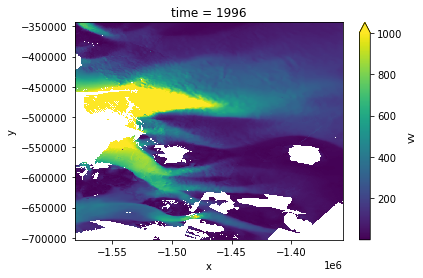

In [45]:
ds_merge.vv.isel(time=0).plot(vmax=1000)

and add the `attrs` of the original object to our new object, `ds_full`

In [46]:
ds_merge.attrs = ds.attrs

In [47]:
ds_merge

<xarray.Dataset>
Dimensions:  (x: 500, y: 800, time: 10)
Coordinates:
  * x        (x) float32 -1.581e+06 -1.581e+06 ... -1.357e+06 -1.357e+06
  * y        (y) float32 -7.032e+05 -7.028e+05 ... -3.442e+05 -3.437e+05
  * time     (time) int64 1996 2000 2002 2006 2007 2008 2009 2010 2011 2012
Data variables:
    vx       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vy       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    err      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vv       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/21)
    Title:                ASE Time Series - Ice Velocity
    Version:              1.0.0 (18Oct2013)
    nx:                   1707
    ny:                   2268
    Projection:                    Polar Stereographic South
    Ellipsoid:                      WGS-84
    ...                   ...
    Reference:                Mouginot J., B. Scheuchl and E. Rignot (2012), ...
    Notes_2:                    Please also include the following data set re...
    Data_citation:        NSIDC Citation Rignot, E., J. Mouginot, and B. Sche...
    More_information:     http://nsidc.org/data/nsidc-0545.html
    Notes_3:                       Data were processed at the Department of E...
    Description:          Created a spatial subset of original dataset. Selec...

Checking against original version to make sure it's the same:

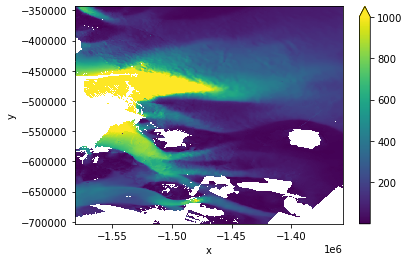

In [48]:
np.sqrt((ds.vx1996**2) + (ds.vy1996**2)).plot(vmax=1000)